# Practice 2 PAN

## Alexandre Sousa Cajide & Pedro Otero García

## Q1

From the satetment we know that $X_i \in \{0,1\}$. Such as it is shown in the randomize mechanism, $Y_i$ (RR) can be either ther real answer ($X_i$) or an altered answer ($1-X_i$) with a certain probability ($1-\gamma$, in the case of the strategy). If $X_i=1$, then $1-X_i=0$ and viceversa, it seems that the strategy success defining the mechanism.

Now, let's focus at how it works the mechanism:
* After the first coin we have a 50% of chances of obtaing truth.
* After the second coin, the result are going to be true in half of the cases.

Therefore, we know that the final result are going to be tampered in 25% of the cases, i.e. $\gamma=\frac{3}{4}$.

In [13]:
p = 0.5 #Probabilidad de haber copiado
gamma = 0.5 + p*0.25 + (1-p)*0.25
print(gamma)

0.75


## Q2

In [10]:
import numpy as np

def avg(v):
    return sum(v)/len(v)

def rr(X):
    Y = []
    for i in X:
        coin = np.random.binomial(n=1, p=0.5)
        # coin = 1 => Face
        if not coin:
            Y.append(i)
        else:
            coin = np.random.binomial(n=1, p=0.5)
            if coin:
                Y.append(0) # Not cheated
            else:
                Y.append(1) # Cheated

    return np.array(Y)

n = 100000
p = 0.2
X = np.random.binomial(n=1, p=p, size=n)

Y = rr(X)

gamma_hat = 1 - avg(Y ^ X)
gamma_hat

0.7507699999999999

## Q3

The value $q$ shows the probability that a random answer is _CHEATED_ or not. We already know that:
* In the 50% of the cases the answer does not change and it has a probability $p$ that be _CHEATED_.
* In the other 50%, the probability to be _CHEATED_ is 50%.

Thus, we have to take into account two probabilities:

* Do not change the answer and cheat: $\gamma p$
* Change the answer and do not cheat: $(1-\gamma)\cdot (1-p)$

Which gives rise to:

$$
q = \gamma p + (1-\gamma)\cdot(1-p) = 2\gamma p +1 -p-\gamma \iff\\
\iff \hat{p}=\frac{q+\gamma -1}{2\gamma -1}
$$

If we apply the result of the last question ($\gamma=\frac{3}{4}$):

$$
q = \frac{1}{2}p + \frac{1}{4}\\
\hat{p}=2q -\frac{1}{2}
$$




## Q4

Average of results: 0.0007400000000000095


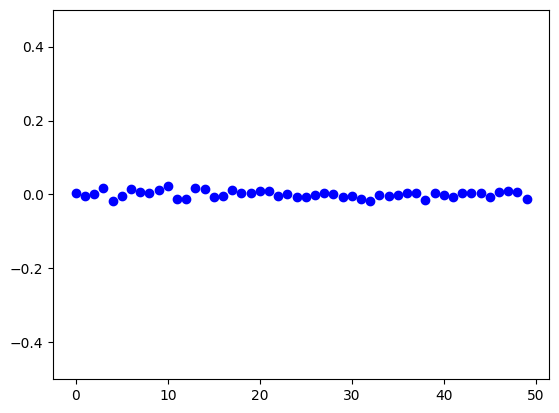

In [12]:
import matplotlib.pyplot as plt

results = []
n = 10000
p = 0.2
for i in range(50):
    X = np.random.binomial(n=1, p=p, size=n)
    Y = rr(X)
    q = sum(Y)/len(Y)
    p_hat = 2*q - 1/2
    results.append(p-p_hat)

plt.scatter(range(len(results)), results, marker='o', color='b', label='p-p_hat')
plt.ylim(-0.5,0.5)
print("Average of results: "+str(avg(results)))

## Q5

Our goal in this exercise is compute $Var[p-\hat{p}]$. Knowing that $p$ is the average of $X$ and the expectation for $\hat{p}$ ($E[\hat{p}]=p$), its variance in $0$ $\Rightarrow Var[p-\hat{p}]=Var[\hat{p}]$.

* From Q5: $\quad\hat{p}=\frac{q+\gamma -1}{2\gamma -1}$

$$
Var[\hat{p}] = Var\left[\frac{q+\gamma -1}{2\gamma -1}\right]=\left(\frac{1}{2\gamma -1}\right)^2\cdot\bigl(Var[q]+Var[\gamma-1]\bigr)=^{*_{1,2}}\\
$$

$$
= \left(\frac{1}{2\gamma -1}\right)^2 \frac{q\cdot (1-q)}{n}=^{*_3}\\
$$

$$
= \left(\frac{1}{2\gamma -1}\right)^2 \cdot\frac{(2\gamma p +1 -p-\gamma)(-2\gamma p +p+\gamma)}{n}
$$


* For $\gamma=\frac{3}{4}$: $Var[p-\hat{p}]=4\cdot\frac{-4p^2+4p+3}{4n}= \frac{-4p^2+4p+3}{n}$


($*_1$) As long as $\gamma -1$ is a constant $\Rightarrow Var[\gamma -1]=0$.

($*_2$)
$$
Var[q]=Var\left[\frac{1}{n}\sum_{i=1}^n Y_i\right]=\frac{1}{n^2}\sum_{i=1}^nVar\left[ Y_i\right]=^{*_4}\\
=\frac{1}{n}Var\left[Y_i\right]=^{*_5}\frac{q\cdot (1-q)}{n}
$$

($*_3$) In Q3 we obtained that $q = \gamma p + (1-\gamma)\cdot(1-p)= 2\gamma p +1 -p-\gamma$

($*_4$) The variables $Y_i$ are independent.

($*_5$)
$$
Var[Y_i]= E[Y_i^2]-E[Y_i]^2 = q - q^2 = q(1-q)\\
$$

* $E[Y_i] = P[Y_i = 1]\cdot 1 + P[Y_i=0]\cdot 0= P[Y_i = 1]=q$
* $E[Y_i^2] = P[Y_i^2 = 1]\cdot 1 + P[Y_i^2=0]\cdot 0=\\
= P[Y_i^2 = 1]=P[Y_i=1]=q$


# -

When $n$ grows the second part of $Var[p-\hat{p}]$ tends to decrease in absolute value (the result is closest to 0). Therefore:

$$
\lim_{n \to \infty}(Var[p-\hat{p}])=0
$$

I.e. the variance of is null and as long as $E[\hat{p}]=p$, then it means that for $n\rightarrow\infty\Rightarrow\hat{p}=p$ .

## Q6

Result for n=1000: 
	 - Empirical variance: 0.000809
	 - Theoretical variance: 0.003040



(-0.005, 0.005)

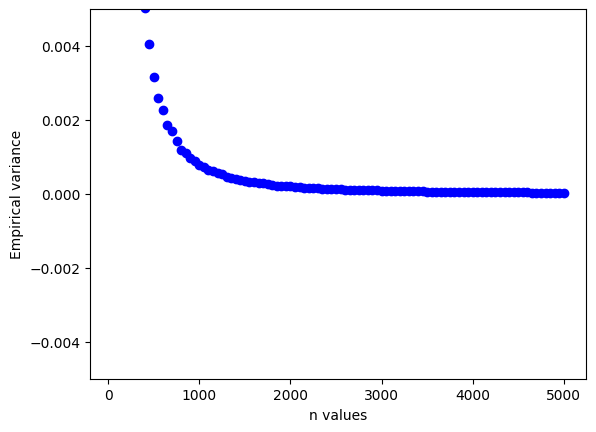

In [55]:
def compute_emp_and_th_vars(p: float, n: int, times: int):
  p_array = []

  for i in range(times):
    X = np.random.binomial(n=1, p=p, size=n)
    p_array.append(avg(X))

  avg_p = avg(p_array)
  emp_var = sum((p_array - avg_p) ** 2)/n
  th_var = (-4*p**2 + p + 3)/n

  return emp_var, th_var

p=0.2; times=5000; n = 1000

emp_var, th_var = compute_emp_and_th_vars(p, n, times)
print('Result for n=%i: \n'
      '\t - Empirical variance: %f\n'
      '\t - Theoretical variance: %f\n' % (n, emp_var, th_var))

n_array = np.linspace(50, 5000, 100)
p_plot = []
for i in n_array:
    emp_var, _ = compute_emp_and_th_vars(p=p, n=int(i), times=times)
    p_plot.append(emp_var)

plt.xlabel('n values')
plt.ylabel('Empirical variance')
plt.scatter(n_array, p_plot, marker='o', color='b', label='p-p_hat')
plt.ylim(-0.005,0.005)

## Q7


On the one hand, when $\gamma=1$ the result is deterministic and is the truth, and viceversa for $\gamma = 0$ (the result is always tamped):

$$
q=\gamma p + (1-\gamma)\cdot(1-p)\\
Var[p-\hat{p}]= \left(\frac{1}{2\gamma -1}\right)^2 \cdot\frac{(2\gamma p +1 -p-\gamma)(-2\gamma p +p+\gamma)}{n}\\
\gamma = 1 \Rightarrow q = p,\quad Var[p-\hat{p}]=\frac{p(1-p)}{n}\\
\gamma = 0 \Rightarrow q = 1-p\quad Var[p-\hat{p}]=\frac{p(1-p)}{n}
$$

We can recovery the number of students who *CHEATED* (the best accuracy but no privacy).

On the other mand, when $\gamma=\frac{1}{2}$ we don't have any clue about the real answers:

$$
\gamma = \frac{1}{2} \Rightarrow q = \frac{1}{2}, \quad Var[p-\hat{p}]=\infty
$$

We have that $q$ is independent of $p$ and the variance is $\infty$ achiving the maximum privacy but the lower accuracy.



## Q8


I know, as a professor, the values of $Y_i$ when students trust me. When they don't trust me, Prof. Trustworthy give me q. The values of $Y_i$ are anonymous so the order of the answers are not important an we can already compute the number of $Y_i= CHEATED$ as long as we know the number of students and $q$:

$$
\quad \sum_{i=1}^n Y_i = q / n
$$

Therefore, students does not increase their security because we can obtain the same information in both scenarios.